In [1]:
import sys
sys.executable

'/Users/sunkikim/algoTrade/algovenv/bin/python3'

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
# data = yf.download('FB', start = '2017-04-01', end='2020-04-01')
data = yf.download('MSFT', start = '2007-04-01', end='2020-04-01')
data.to_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed


### sample trading strategy and backtesting

- moving average : slow ~ fast ( 1day ~ 200day)
[개념이해 자료링크!](https://kr.tradingview.com/ideas/ema/?solution=43000502589)

    - Simple moving average : sum in period / num of period
    - Weighted moving average
        - Linearly weighted moving average
        - Exponential (Weighted) moving average 
            - $EMA_{t} = (종가_{t} - EMA_{t-1})*multiplier + EMA_{t-1}$
            - ${weightage Multiplier}= \frac{2}{(기간+1)}$
    - Moving average convergence divergence
    

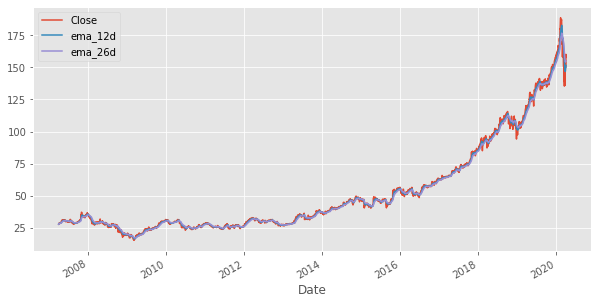

In [9]:
## exponentially weighted moving average 

data = pd.read_csv('MSFT.csv', index_col=0)

# dayfirst : year-month-day order format
data.index = pd.to_datetime(data.index, dayfirst=True) 

# Calculate exponential moving average : 기간 --> span
data = data.assign(
    ema_12d = data.Close.ewm(span=12).mean(),
    ema_26d = data.Close.ewm(span=26).mean(),
)

# Visualise the data
# plt.figure(figsize=(10,5))
data[['Close','ema_12d','ema_26d']].plot(figsize=(10,5))
# plt.legend()
# plt.show()

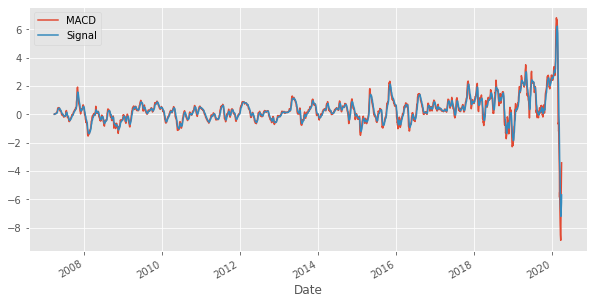

In [10]:
## macd chart


# Calculate MACD
data['MACD'] = data['ema_12d'] - data['ema_26d']

# Calculate Signal : 최근 9일간 단기-중기 가격차이의 평균 ( MACD의 기증이동평균선 )
data['Signal'] = data.MACD.ewm(span=9).mean()

data[['MACD','Signal']].plot(figsize=(10,5))
plt.show()

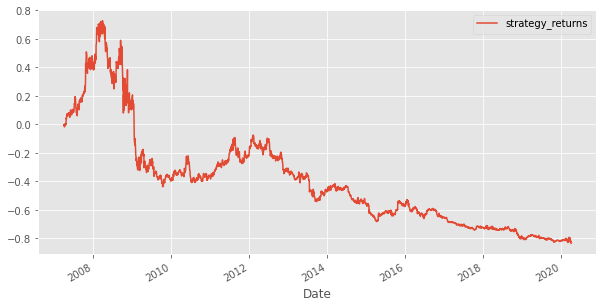

In [14]:
## trading strategy and return chart

data['trading_signal'] = np.where(data['MACD'] > data['Signal'], 1, -1)

# daily trading return 구하기 

# Calculate daily Returns
data['returns'] = data.Close.pct_change()

# Calculate Strategy Returns : 전날 종가 매수,  당일 종가 매도
data['strategy_returns'] = data.returns * data.trading_signal.shift(1)

# Calculate Cumulative Returns
cumulative_returns = (data.strategy_returns + 1).cumprod()-1

# Plot Strategy Returns
cumulative_returns.plot(figsize=(10,5))
plt.legend()
plt.show()


In [13]:
data.trading_signal.shift(1)

Date
2007-04-02    NaN
2007-04-03   -1.0
2007-04-04    1.0
2007-04-05    1.0
2007-04-09    1.0
             ... 
2020-03-25   -1.0
2020-03-26   -1.0
2020-03-27    1.0
2020-03-30    1.0
2020-03-31    1.0
Name: trading_signal, Length: 3273, dtype: float64